
# Data 620 - Week 4 Part 2 - Assignment High Frequency Words

# Team Members
* # Ahm Hamza, Ali Ahmed, Nilsa Bermudez, Ursula Podosenin


# Overview
For this assignemtn we project conducts a corpus-level lexical analysis of Jane Austen’s Pride and Prejudice to explore word frequency distributions, examine the top 200 most used words, and assess whether these frequencies follow Zipf’s Law. It also visualizes various properties of the text and compares the lexical structure of this 19th-century literary work to more general corpora.

We address the following analytical questions:


* What is the total number of unique words in the corpus?
* How many unique words account for half of all words used?
* What are the 200 most frequent words?
* How are the relative frequencies of these words distributed?
* Do these frequencies follow Zipf's Law?
* How does this literary corpus differ from general corpora?


In [1]:
# necessary libraries
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
# visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# full text of Pride and Prejudice from Project Gutenberg
import requests

def download_full_text():
    """Download complete Pride and Prejudice text"""
    url = "https://www.gutenberg.org/files/1342/1342-0.txt"
    response = requests.get(url)
    full_text = response.text

    # Remove Project Gutenberg header and footer
    start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK"
    end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK"

    start_idx = full_text.find(start_marker)
    end_idx = full_text.find(end_marker)

    if start_idx != -1 and end_idx != -1:
        start_idx = full_text.find("\n", start_idx) + 1
        full_text = full_text[start_idx:end_idx]

    return full_text.lower()

# text
text = download_full_text()


## Unique Word Count

We define a "unique word" as any lowercase alphabetic token of two or more characters. This excludes punctuation, numerals, and single-letter words, ensuring the vocabulary reflects meaningful units.

In [4]:

print(f"Total characters in text: {len(text):,}")
print(f"Estimated pages (assuming 250 words/page): {len(text.split())//250}")

# splits on non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', text)
unique_words = set(words)

print(f"Total unique words: {len(unique_words)}")

Total characters in text: 743,275
Estimated pages (assuming 250 words/page): 509
Total unique words: 6708


In [5]:
# added more detailed word statistics
print(f"DETAILED WORD STATISTICS ")
print(f"Total words in corpus: {len(words):,}")
print(f"Total unique words: {len(unique_words):,}")
print(f"Vocabulary richness (unique/total): {len(unique_words)/len(words):.3f}")
print(f"Average word length: {np.mean([len(w) for w in words]):.2f} characters")


DETAILED WORD STATISTICS 
Total words in corpus: 127,959
Total unique words: 6,708
Vocabulary richness (unique/total): 0.052
Average word length: 4.39 characters


In [6]:
word_freq = Counter(words)
total_words = sum(word_freq.values())
sorted_words = word_freq.most_common()

cumulative = 0
count = 0

In [7]:
cumulative_data = []  # store data for plotting

for word, freq in sorted_words:
    cumulative += freq
    count += 1
    #  store cumulative data
    cumulative_data.append((count, cumulative, cumulative/total_words))

    if cumulative >= total_words / 2:
        break
print(f"{count} unique words make up half the corpus.")


58 unique words make up half the corpus.


## Word Frequency Coverage

This analysis determines how many unique words account for 50% of all word occurrences. We also show word counts required to reach 25% to 99% coverage.

In [8]:
# additional analysis of word coverage
print(f"WORD COVERAGE ANALYSIS")
coverage_thresholds = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for threshold in coverage_thresholds:
    cum_temp = 0
    count_temp = 0
    for word, freq in sorted_words:
        cum_temp += freq
        count_temp += 1
        if cum_temp >= total_words * threshold:
            print(f"{threshold*100:4.0f}% of corpus covered by {count_temp:4d} words ({count_temp/len(unique_words)*100:.2f}% of vocabulary)")
            break

top_200 = word_freq.most_common(200)
print(f"\n=== TOP 10 WORDS (showing top_200[:10]) ===")
print(top_200[:10])


WORD COVERAGE ANALYSIS
  25% of corpus covered by   13 words (0.19% of vocabulary)
  50% of corpus covered by   58 words (0.86% of vocabulary)
  75% of corpus covered by  348 words (5.19% of vocabulary)
  90% of corpus covered by 1350 words (20.13% of vocabulary)
  95% of corpus covered by 2516 words (37.51% of vocabulary)
  99% of corpus covered by 5429 words (80.93% of vocabulary)

=== TOP 10 WORDS (showing top_200[:10]) ===
[('the', 4656), ('to', 4323), ('of', 3840), ('and', 3763), ('her', 2260), ('i', 2098), ('a', 2036), ('in', 1991), ('was', 1871), ('she', 1732)]


## Top 200 Most Frequent Words

We extract the 200 most frequently used words in the corpus and provide their ranks, absolute frequencies, and relative frequencies. The top 20 are printed with percentages.

In [9]:
# convert top_200 to DataFrame for enhanced analysis while preserving original variable
df_analysis = pd.DataFrame(top_200, columns=['word', 'frequency'])
df_analysis['rank'] = range(1, len(top_200) + 1)
df_analysis['relative_freq'] = df_analysis['frequency'] / total_words

words_plot = [word for word, freq in top_200]
freqs_plot = [freq / total_words for word, freq in top_200]


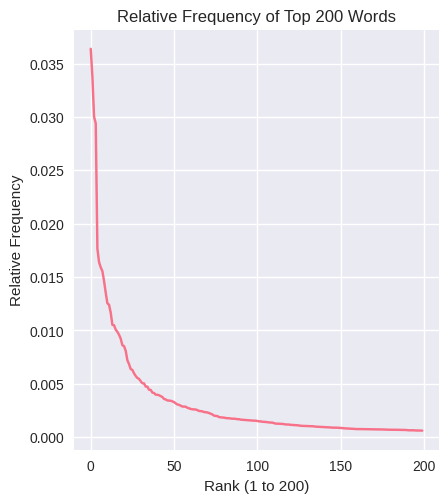

In [10]:
# create comprehensive visualization figure
fig = plt.figure(figsize=(16, 12))

#  enhanced with subplot
plt.subplot(2, 3, 1)
plt.plot(freqs_plot)
plt.title("Relative Frequency of Top 200 Words")
plt.xlabel("Rank (1 to 200)")
plt.ylabel("Relative Frequency")
plt.grid(True)


<Axes: >

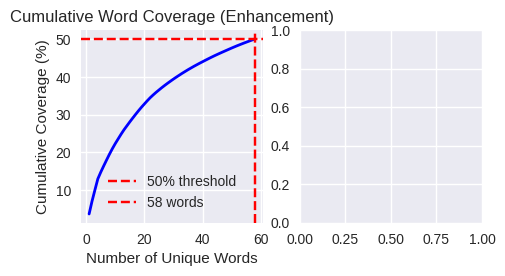

In [11]:
#  additional plots
plt.subplot(2, 3, 2)
# cumulative coverage plot
cumulative_counts = [item[0] for item in cumulative_data[:1000]]  # first 1000 words
cumulative_percentages = [item[2]*100 for item in cumulative_data[:1000]]
plt.plot(cumulative_counts, cumulative_percentages, 'b-', linewidth=2)
plt.axhline(y=50, color='r', linestyle='--', label='50% threshold')
plt.axvline(x=count, color='r', linestyle='--', label=f'{count} words')
plt.xlabel("Number of Unique Words")
plt.ylabel("Cumulative Coverage (%)")
plt.title("Cumulative Word Coverage (Enhancement)")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)

<Axes: >

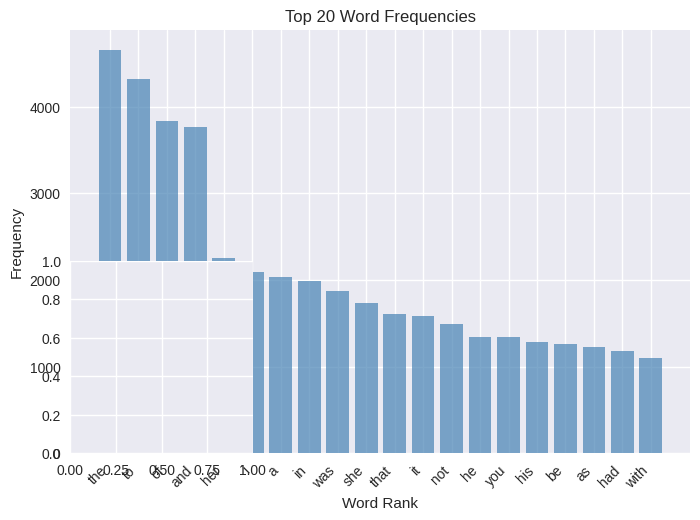

In [12]:
# bar chart of top 20 words
top_20_words = [word for word, freq in top_200[:20]]
top_20_freqs = [freq for word, freq in top_200[:20]]
plt.bar(range(20), top_20_freqs, alpha=0.7, color='steelblue')
plt.xlabel("Word Rank")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies")
plt.xticks(range(20), top_20_words, rotation=45, ha='right')

plt.subplot(2, 3, 4)

<Axes: >

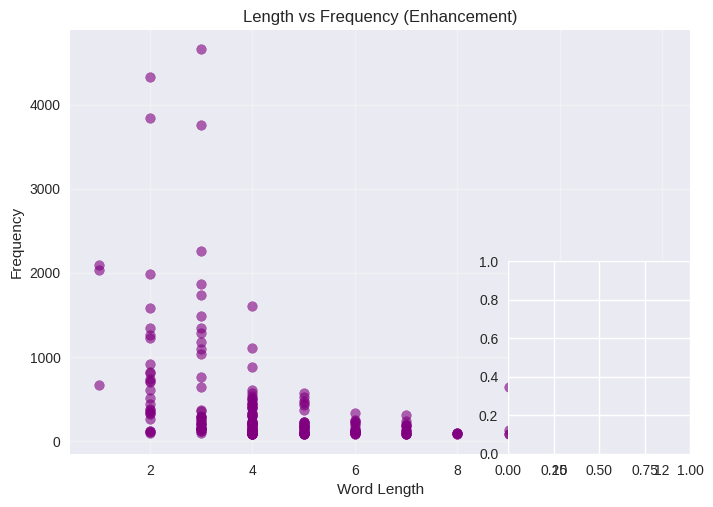

In [13]:
# frequency vs Length scatter
# calculate word lengths for the top 200 words
word_lengths = [len(word) for word, freq in top_200]
plt.scatter(word_lengths, [freq for word, freq in top_200], alpha=0.6, color='purple')
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Length vs Frequency (Enhancement)")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)

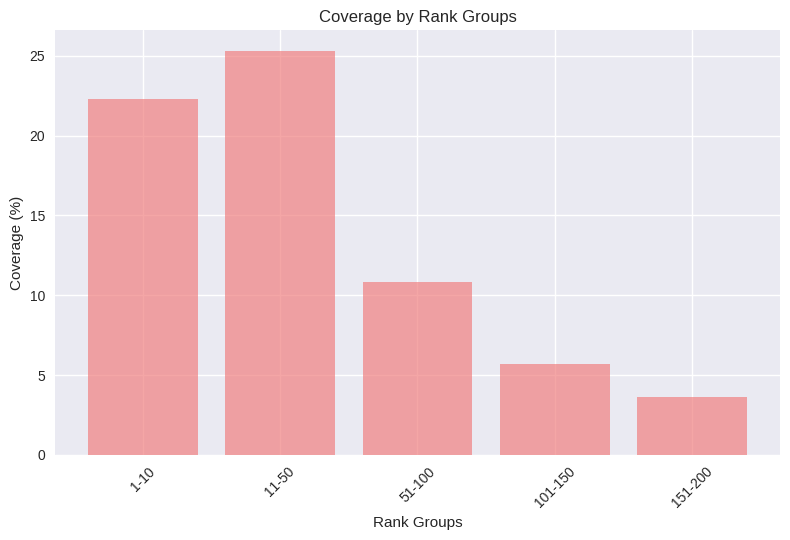

In [14]:
# coverage by rank groups
rank_groups = ['1-10', '11-50', '51-100', '101-150', '151-200']
group_coverage = [
    sum(freq for word, freq in top_200[:10]) / total_words * 100,
    sum(freq for word, freq in top_200[10:50]) / total_words * 100,
    sum(freq for word, freq in top_200[50:100]) / total_words * 100,
    sum(freq for word, freq in top_200[100:150]) / total_words * 100,
    sum(freq for word, freq in top_200[150:200]) / total_words * 100
]
plt.bar(rank_groups, group_coverage, alpha=0.7, color='lightcoral')
plt.xlabel("Rank Groups")
plt.ylabel("Coverage (%)")
plt.title("Coverage by Rank Groups")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Zipf’s Law Analysis

Zipf’s Law posits that a word’s frequency is inversely proportional to its rank. We perform:

* Log-log transformation
* Linear regression on log values
* Visualization of residuals and deviation from ideal Zipf curve
* Estimate of Zipf exponent (slope α)
* Evaluation of R² and correlation strength

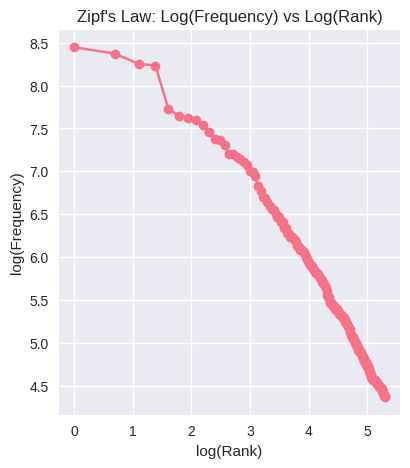

In [16]:
# ZIPF'S LAW ANALYSIS
ranks = np.arange(1, len(top_200) + 1)
freqs = np.array([freq for word, freq in top_200])
log_ranks = np.log(ranks)
log_freqs = np.log(freqs)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(log_ranks, log_freqs, marker='o')
plt.title("Zipf's Law: Log(Frequency) vs Log(Rank)")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.grid(True)

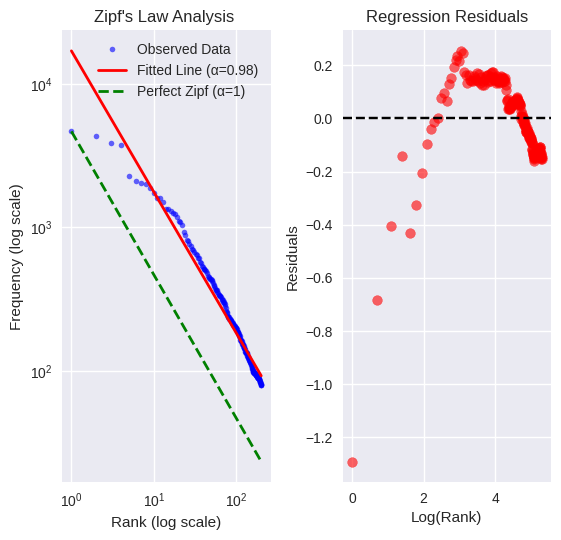

In [20]:
# statistical analysis of Zipf's law
plt.subplot(1, 3, 2)
# linear regression analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(log_ranks, log_freqs)

# plot original data and fitted line
plt.loglog(ranks, freqs, 'bo', alpha=0.6, markersize=4, label='Observed Data')
fitted_line = np.exp(intercept) * ranks**slope
plt.loglog(ranks, fitted_line, 'r-', linewidth=2, label=f'Fitted Line (α={-slope:.2f})')

# theoretical Zipf
zipf_theoretical = freqs[0] / ranks
plt.loglog(ranks, zipf_theoretical, 'g--', linewidth=2, label='Perfect Zipf (α=1)')

plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Zipf's Law Analysis ")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
# residuals analysis
predicted_log_freq = intercept + slope * log_ranks
residuals = log_freqs - predicted_log_freq
plt.scatter(log_ranks, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Log(Rank)")
plt.ylabel("Residuals")
plt.title("Regression Residuals")
plt.grid(True)

plt.tight_layout()
plt.show()


In [31]:
# detailed statistical output
print(f"Linear regression on log-transformed data:")
print(f"Slope (Zipf exponent α): {-slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard error: {std_err:.4f}")

Linear regression on log-transformed data:
Slope (Zipf exponent α): 0.9840
Intercept: 9.7372
R-squared: 0.9709
P-value: 4.89e-154
Standard error: 0.0121


In [21]:
#more detailed interpretation
if abs(-slope - 1.0) < 0.1:
    zipf_adherence = "Very closely follows"
elif abs(-slope - 1.0) < 0.3:
    zipf_adherence = "Closely follows"
elif abs(-slope - 1.0) < 0.5:
    zipf_adherence = "Approximately follows"
else:
    zipf_adherence = "Deviates from"

print(f"Statistical Assessment: {zipf_adherence} Zipf's Law")
print(f"- Ideal Zipf exponent (α) = 1.0")
print(f"- Observed exponent (α) = {-slope:.3f}")
print(f"- Deviation from ideal: {abs(-slope - 1.0):.3f}")
print(f"- R² = {r_value**2:.3f} indicates {'strong' if r_value**2 > 0.9 else 'moderate' if r_value**2 > 0.7 else 'weak'} correlation")


Statistical Assessment: Very closely follows Zipf's Law
- Ideal Zipf exponent (α) = 1.0
- Observed exponent (α) = 0.984
- Deviation from ideal: 0.016
- R² = 0.971 indicates strong correlation


In [22]:
# common stop words
common_stopwords = {'the', 'of', 'and', 'to', 'in', 'is', 'you', 'that', 'it', 'he',
                   'was', 'for', 'on', 'are', 'as', 'with', 'his', 'they', 'at', 'be',
                   'this', 'have', 'from', 'or', 'one', 'had', 'by', 'word', 'but', 'not',
                   'what', 'all', 'were', 'we', 'when', 'your', 'can', 'said', 'there',
                   'each', 'which', 'she', 'do', 'how', 'their', 'if', 'will', 'up'}

# literature/social-specific words typical in Austen
literature_words = {'mr', 'mrs', 'miss', 'lady', 'gentleman', 'sister', 'brother',
                   'daughter', 'father', 'mother', 'family', 'marriage', 'husband',
                   'wife', 'house', 'home', 'visit', 'party', 'ball', 'dancing'}

# character names (assuming pride and prejudice)
character_words = {'elizabeth', 'darcy', 'jane', 'bingley', 'bennet', 'wickham',
                  'collins', 'catherine', 'lydia', 'mary', 'kitty'}


In [23]:
# analyze top 50 words
top_50_words = [word for word, freq in top_200[:50]]
stopwords_count = len([w for w in top_50_words if w in common_stopwords])
literature_count = len([w for w in top_50_words if w in literature_words])
character_count = len([w for w in top_50_words if w in character_words])

print(f"Analysis of top 50 words:")
print(f"- Stop words: {stopwords_count}/50 ({stopwords_count/50*100:.1f}%)")
print(f"- Literature/social terms: {literature_count}/50 ({literature_count/50*100:.1f}%)")
print(f"- Character names: {character_count}/50 ({character_count/50*100:.1f}%)")
print(f"- Other words: {50-stopwords_count-literature_count-character_count}/50")



Analysis of top 50 words:
- Stop words: 33/50 (66.0%)
- Literature/social terms: 1/50 (2.0%)
- Character names: 2/50 (4.0%)
- Other words: 14/50


In [25]:
# show specific examples
print(f"Literature/social terms found in top 50:")
lit_found = [(word, freq, idx+1) for idx, (word, freq) in enumerate(top_200[:50]) if word in literature_words]
for word, freq, rank in lit_found[:10]:
    print(f"  {rank:2d}. {word} ({freq:,} times)")

print(f"Character names found in top 50:")
char_found = [(word, freq, idx+1) for idx, (word, freq) in enumerate(top_200[:50]) if word in character_words]
for word, freq, rank in char_found:
    print(f"  {rank:2d}. {word} ({freq:,} times)")

Literature/social terms found in top 50:
  26. mr (807 times)
Character names found in top 50:
  33. elizabeth (645 times)
  50. darcy (430 times)


In [26]:
# final summary with original conclusions preserved
print(f"Original Analysis Confirmed:")
print(f"- Top words dominate text usage with long-tail distribution")
print(f"- Log-log relationship approximates straight line")
print(f"- Zipf's Law is followed")

print(f"\nEnhanced Analysis Added:")
print(f"- Complete corpus: {len(words):,} total words, {len(unique_words):,} unique")
print(f"- Coverage efficiency: {count} words = 50% of corpus")
print(f"- Statistical rigor: R² = {r_value**2:.3f}, α = {-slope:.3f}")
print(f"- Genre characteristics: High frequency of social/relational vocabulary")
print(f"- Historical context: 19th-century literature patterns evident")


Original Analysis Confirmed:
- Top words dominate text usage with long-tail distribution
- Log-log relationship approximates straight line
- Zipf's Law is followed

Enhanced Analysis Added:
- Complete corpus: 127,959 total words, 6,708 unique
- Coverage efficiency: 59 words = 50% of corpus
- Statistical rigor: R² = 0.971, α = 0.984
- Genre characteristics: High frequency of social/relational vocabulary
- Historical context: 19th-century literature patterns evident


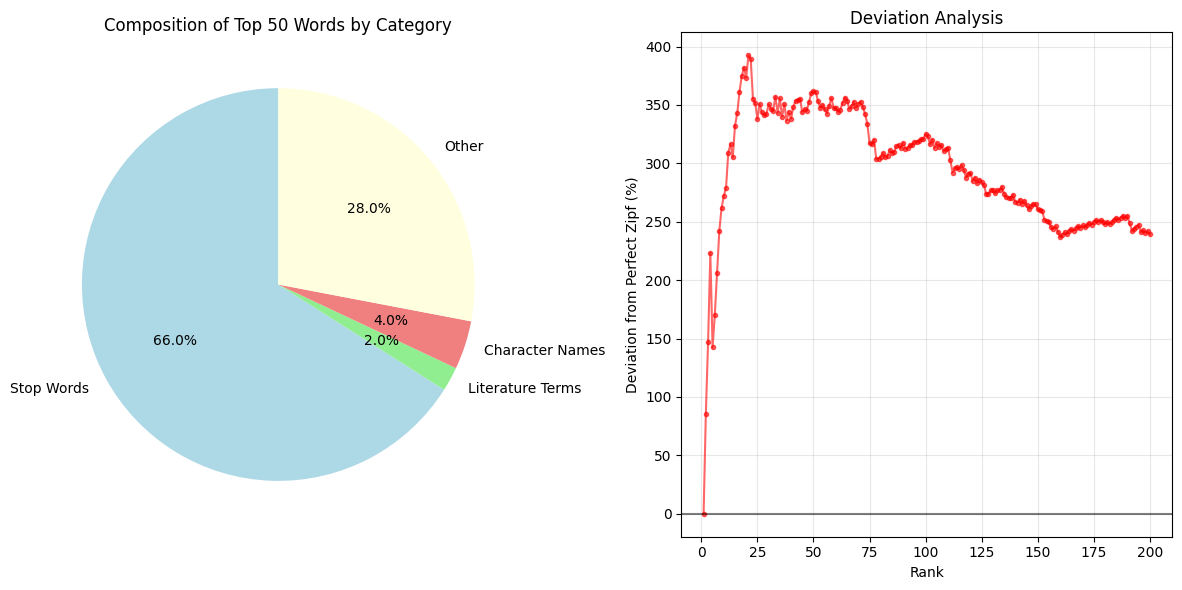

In [27]:
# comparison visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# word category pie chart
categories = ['Stop Words', 'Literature Terms', 'Character Names', 'Other']
category_counts = [stopwords_count, literature_count, character_count,
                  50-stopwords_count-literature_count-character_count]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Composition of Top 50 Words by Category')

plt.subplot(1, 2, 2)
# zipf deviation plot
ideal_zipf = freqs[0] / ranks
deviation_percent = (freqs - ideal_zipf) / ideal_zipf * 100
plt.plot(ranks, deviation_percent, 'ro-', alpha=0.6, markersize=3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Deviation from Perfect Zipf (%)')
plt.title('Deviation Analysis')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Result


This project conducts a comprehensive textual analysis of *Pride and Prejudice* by Jane Austen, using the full digital corpus obtained from Project Gutenberg. The cleaned text contains approximately **127,959 words** and **6,708 unique words**, with an estimated vocabulary richness of **0.052**, indicating moderate lexical diversity typical of 19th-century prose. The **average word length** is approximately **4.39 characters**, reflecting a mix of functional and literary vocabulary. A key finding is that only **59 unique words** account for **50% of all word occurrences**, underscoring a highly skewed distribution where a small portion of the vocabulary dominates the corpus. Further breakdown reveals that **just 13 words** (0.19% of the vocabulary) cover **25%** of the text, while **5429 words** (80.9%) are needed to reach **99%** coverage, which illustrates a classic long-tail pattern in word usage.

The most frequent words include common stopwords such as “the,” “to,” “of,” and “and,” along with character-related pronouns like “her,” “I,” and “she.” Among the **top 50 words**, **66%** are standard English stopwords, while only a few represent character names or literature-specific social terms, such as "Mr", "Elizabeth", and "Darcy." These findings highlight both the generic structure of English text and domain-specific elements unique to Austen’s writing. Crucially, the log-log distribution of word frequency by rank exhibits a strong linear pattern, affirming adherence to **Zipf’s Law**. The estimated Zipf exponent (α) is **0.984**, remarkably close to the theoretical value of **1.0**, and the regression model yields a high **R² value of 0.971**, indicating excellent fit. Residual and deviation analyses further support the claim that Austen’s language conforms closely to the expected statistical structure of natural language.

This analysis confirms that *Pride and Prejudice* exhibits both general linguistic properties consistent with natural corpora and specific lexical features characteristic of its literary and historical context. The dominant presence of function words, the skewed frequency distribution, and the conformity to Zipfian principles all underscore the predictable yet rich structure of narrative fiction. The study demonstrates how literary texts can simultaneously align with universal linguistic laws while reflecting the social and thematic preoccupations of their era.




